<a href="https://colab.research.google.com/github/codedyasai/Python_MachineLearning/blob/main/05_%ED%94%BC%EB%A7%88_%EC%9D%B8%EB%94%94%EC%96%B8_%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%98%88%EC%B8%A1_%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 정의
- 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수렴하고 평가지표를 적용해보자.
- 북아메리카 피마 지역 원주민의 2형 당뇨병 결과 데이터

# 모듈 로딩

In [ ]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

# 데이터 불러오기
- https://www.kaggle.com/uciml/pima-indians-diabetes-database
- diabetes.csv

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

In [ ]:
print(X.shape)

(768, 8)


In [ ]:
print(y.shape)

(768,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, precision_recall_curve

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y)

In [ ]:
# 데이터 정규화
ss = StandardScaler()
train_scaled = ss.fit_transform(x_train)
test_scaled = ss.transform(x_test)

In [ ]:
lr = LogisticRegression()
lr.fit(train_scaled, y_train)
pred = lr.predict(test_scaled)
pred_proba = lr.predict_proba(test_scaled)[:, 1]

In [ ]:
# get(실제값, 예측값, 예측확률)
def get(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬(혼돈 행렬)')
    print(confusion)

    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')

In [ ]:
get(y_test, pred, pred_proba)

오차 행렬(혼돈 행렬)
[[91  9]
 [28 26]]
정확도:0.7597, 정밀도:0.7429, 재현율:0.4815, F1:0.5843, AUC:0.8019


- y가 0값인 Negative가 많으므로 정확도보다 재현율에 초점을 맞춰 평가를 해야한다.

In [ ]:
# 정밀도와 재현율 관계 시각화
def prc(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    plt.figure(figsize= (10, 10))
    boundary= thresholds.shape[0]
    plt.plot(thresholds, precisions[0:boundary], linestyle='--', label= 'precision')
    plt.plot(thresholds, recalls[0:boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel('threshold value') # 임계값
    plt.ylabel('precision and recall')
    plt.legend()
    plt.grid()
    plt.show()

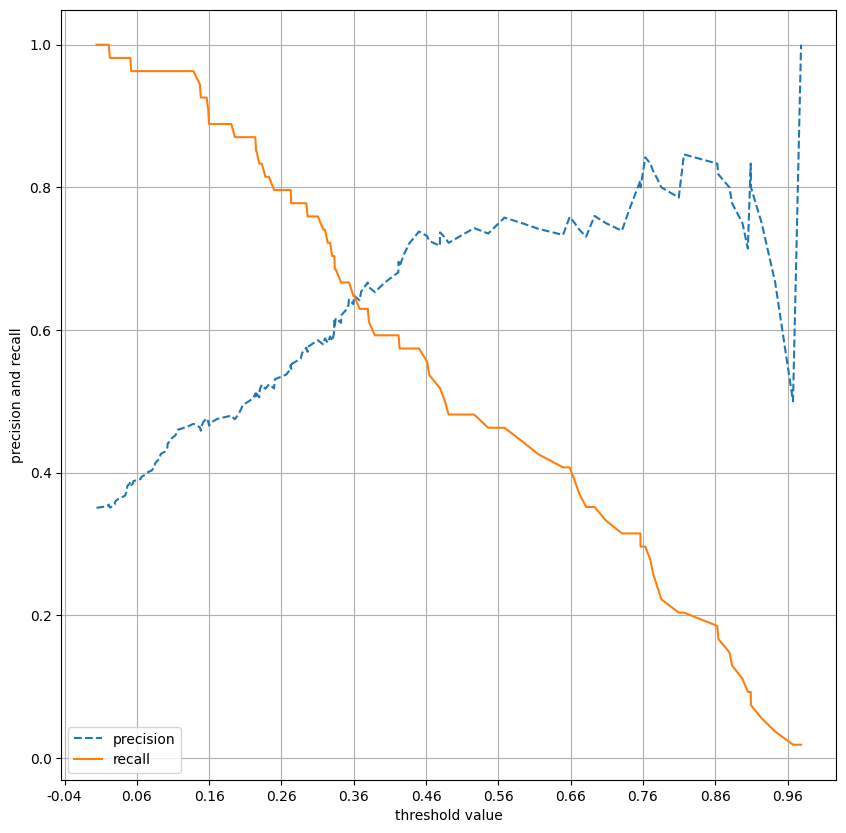

In [ ]:
prc(y_test, pred_proba)

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# min이 0인 경우가 너무 많아서 0값의 건수와 전체 데이터의 건수 대비 비율을 확인
zero_f = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

# 전체 건수 768
total = diabetes.Glucose.count()
# 피처별로 0값의 비율을 추출
for col in zero_f:
    zero_count = diabetes[diabetes[col] == 0][col].count()
    print(f'{col} 피처의 0의 건수는 {zero_count}이고 비율은 {zero_count/total * 100:.2f}')

Pregnancies 피처의 0의 건수는 111이고 비율은 14.45
Glucose 피처의 0의 건수는 5이고 비율은 0.65
BloodPressure 피처의 0의 건수는 35이고 비율은 4.56
SkinThickness 피처의 0의 건수는 227이고 비율은 29.56
Insulin 피처의 0의 건수는 374이고 비율은 48.70
BMI 피처의 0의 건수는 11이고 비율은 1.43


- 0값은 데이터가 누락되었거나 결측으로 봐야한다.
- 0값의 비율이 높기 때문에 제거할 수 없다.
- 결측값의 대체: 연속형=평균, 범주형=최빈값
- 0값을 평균값으로 대체한 후 다시 스케일링하고 학습하고 평가한다.

In [ ]:
zero_features = ['SkinThickness', 'Insulin']
mean = diabetes[zero_features][diabetes[zero_features] != 0].mean()
diabetes[zero_features] = diabetes[zero_features].replace(0, mean)

In [ ]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

x_scaled = ss.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.2, stratify= y)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
pred_proba = lr.predict_proba(x_test)[:, 1]

In [ ]:
get(y_test, pred, pred_proba)

오차 행렬(혼돈 행렬)
[[92  8]
 [24 30]]
정확도:0.7922, 정밀도:0.7895, 재현율:0.5556, F1:0.6522, AUC:0.8602


In [ ]:
# 정밀도와 재현율 관계 시각화
def prc(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    plt.figure(figsize= (10, 10))
    boundary= thresholds.shape[0]
    plt.plot(thresholds, precisions[0:boundary], linestyle='--', label= 'precision')
    plt.plot(thresholds, recalls[0:boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel('threshold value') # 임계값
    plt.ylabel('precision and recall')
    plt.legend()
    plt.grid()
    plt.show()

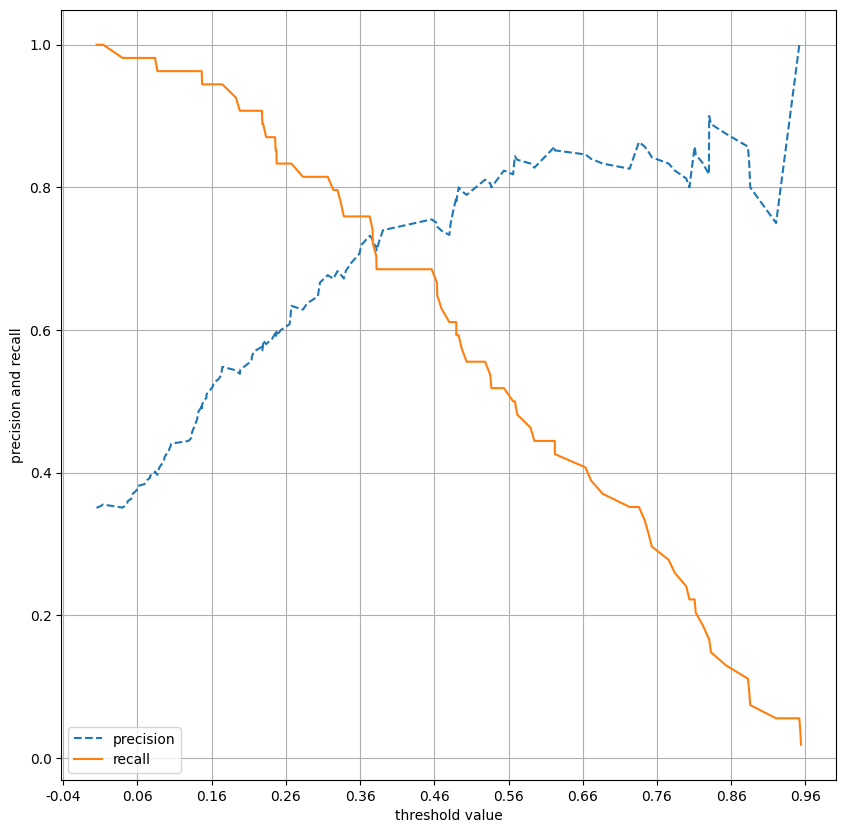

In [ ]:
prc(y_test, pred_proba)

In [ ]:
thresholds = 0.37

predictions = [1 if prob > thresholds else 0 for prob in pred_proba]
get(y_test, predictions, pred_proba)

오차 행렬(혼돈 행렬)
[[85 15]
 [13 41]]
정확도:0.8182, 정밀도:0.7321, 재현율:0.7593, F1:0.7455, AUC:0.8602


In [ ]:
from sklearn.preprocessing import Binarizer

def get_clf(y_test, pred_po, threshold, f1_show= False, auc_show= False):
    disp = pd.DataFrame()

    for thres in threshold:
        # 주어진 임계값에 따른 예측 분류값
        binarizer = Binarizer()
        binarizer.fit(pred_po)
        thres_pred = binarizer.transform(pred_po)

        # 평가지표
        acc = accuracy_score(y_test, thres_pred)
        pre = precision_score(y_test, thres_pred)
        re = recall_score(y_test, thres_pred)
        f1 = f1_score(y_test, thres_pred)
        auc = roc_auc_score(y_test, thres_pred)

        # 데이터 프레임 형태로 추출하기 위한 로직
        eval_list = np.array([acc, pre, re, f1, auc]).reshape(-1, 1)
        temp = pd.DataFrame(eval_list, columns = [thres],
                            index= ['정확도', '정밀도', '재현율', 'F1스코어', 'AUC'])

        disp = pd.concat([disp, temp], axis= 1)

    disp.columns.names = ['임계값']

    if f1_show == False:
        disp.drop('F1스코어', axis= 0, inplace=True)

    if auc_show == False:
        disp.drop('AUC', axis= 0, inplace=True)

    return(round(disp, 4))

In [ ]:
pred_proba_po = lr.predict_proba(x_test)[:,-1].reshape(-1,1)

In [ ]:
thres_lst = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
get_clf(y_test, pred_proba_po, thres_lst, f1_show=True, auc_show=True)

임계값,0.30,0.33,0.36,0.39,0.42,0.45,0.48,0.50
정확도,0.3506,0.3506,0.3506,0.3506,0.3506,0.3506,0.3506,0.3506
정밀도,0.3506,0.3506,0.3506,0.3506,0.3506,0.3506,0.3506,0.3506
재현율,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
F1스코어,0.5192,0.5192,0.5192,0.5192,0.5192,0.5192,0.5192,0.5192
AUC,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000
